In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import os
import imageio

png_dir = "/Users/prasanna/tensorflow_experiments/plot_outputs/"
images = []
for subdir, dirs, files in os.walk(png_dir):
    for file in files:
        file_path = os.path.join(subdir, file)
        if file_path.endswith(".png"):
            images.append(imageio.imread(file_path))
imageio.mimsave('/Users/prasanna/tensorflow_experiments/plot_outputs/test.gif', images, duration = 0.9)

In [109]:
np

<module 'numpy' from '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/__init__.py'>

In [84]:
count = 0
np.random.seed(5)
center_x = 0
center_y = 0
radius = 1
width = 0.5
data = []
while count < 1000 : 
    x = (np.random.rand() - 0.5)*2*radius
    y = (np.random.rand() - 0.5)*2*radius
    if np.sqrt(x**2+y**2) > radius - width and np.sqrt(x**2+y**2) < radius:
        count+=1
        data.append([x+center_x,y+center_y])

# data.append([-1.1,1.1])
# data.append([1.1,1.1])
# data.append([-1.1,-1.1])
# data.append([1.1,-1.1])
data.append([0.0,0.0])
# data.append([0.05,0.05])
# data.append([0.02,0.02])
# data.append([0.02,0.02])
data = np.array(data)

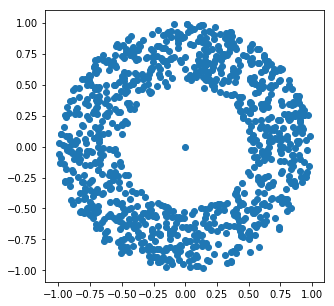

In [85]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(data[:,0],data[:,1]) # c =
plt.show()

In [69]:
count = 0
np.random.seed(5)
center_x = 0
center_y = 0
center_z = 0
radius = 1
width = 0.1
data = []
while count < 1000 : 
    x = (np.random.rand() - 0.5)*2*radius
    y = (np.random.rand() - 0.5)*2*radius
    z = (np.random.rand() - 0.5)*2*radius
    if np.sqrt(x**2+y**2+z**2) > radius - width and np.sqrt(x**2+y**2+z**2) < radius:
        count+=1
        data.append([x+center_x,y+center_y,z+center_z])
        
data = np.array(data)

In [49]:
import plotly.graph_objs as go
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)

In [79]:
from numpy import *
theta = linspace(0,2*pi,100)
phi = linspace(0,pi,100)
x = outer(cos(theta),sin(phi))
y = outer(sin(theta),sin(phi))
z = outer(ones(100),cos(phi))

In [80]:
from numpy import *
theta = linspace(0,2*pi,100)
phi = linspace(0,pi,100)
x2 = x*0.1
y2 = y*0.1
z2 = z*0.1
x.shape
x2.shape

(100, 100)

In [77]:
trace1 = go.Scatter3d(
#     x=data[:,0],
#     y=data[:,1],
#     z=data[:,2],
#     x=reshape(x, x.size)[::17],
#     y=reshape(y, y.size)[::17],
#     z=reshape(z, z.size)[::17],
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
#         color= color,
        colorscale='Viridis',
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
divstring = plot(fig,output_type='div')
wf = open("/Users/prasanna/tensorflow_experiments/plot_outputs/numpysph2.html","w")
wf.write(divstring)
wf.close()
# iplot(fig)

In [83]:
trace1 = go.Scatter3d(
    x=reshape(x, x.size)[::17],
    y=reshape(y, y.size)[::17],
    z=reshape(z, z.size)[::17],
    mode='markers',
    marker=dict(
        size=5,
        color='rgb(200,50,50)',
        colorscale='Viridis',
        opacity=0.8
    )
)

trace2 = go.Scatter3d(
    x=reshape(x2, x2.size)[::17],
    y=reshape(y2, y2.size)[::17],
    z=reshape(z2, z2.size)[::17],
    mode='markers',
    marker=dict(
        size=5,
        color='rgb(200,50,50)',
        colorscale='Viridis',
        opacity=0.8
    )
)

data = [trace1,trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
divstring = plot(fig,output_type='div')
wf = open("/Users/prasanna/tensorflow_experiments/plot_outputs/numpysph3.html","w")
wf.write(divstring)
wf.close()
# iplot(fig)

In [85]:
print (scipy.stats.describe(reshape(x, x.size)[::17]))
print (scipy.stats.describe(reshape(x2, x2.size)[::17]))

DescribeResult(nobs=589, minmax=(-0.99937073342844152, 0.99886733918300796), mean=0.0064195687879037679, variance=0.25001865687025665, skewness=-0.004948929792781006, kurtosis=-0.7316674496792257)
DescribeResult(nobs=589, minmax=(-0.099937073342844157, 0.099886733918300802), mean=0.00064195687879037918, variance=0.002500186568702567, skewness=-0.00494892979278098, kurtosis=-0.7316674496792266)


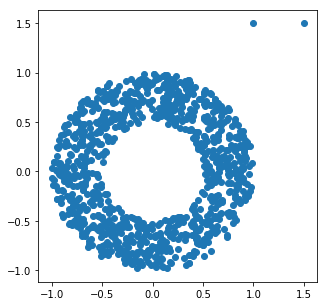

In [10]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(data[:,0],data[:,1]) # c =
plt.show()

In [7]:
import tensorflow as tf

class Autoencoder(object):

    def __init__(self, n_input, n_hidden, transfer_function=tf.nn.softplus, optimizer = tf.train.AdamOptimizer()):
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.transfer = transfer_function

        network_weights = self._initialize_weights()
        self.weights = network_weights

        # model
        self.x = tf.placeholder(tf.float32, [None, self.n_input])
        self.hidden = self.transfer(tf.add(tf.matmul(self.x, self.weights['w1']), self.weights['b1']))
        self.reconstruction = tf.add(tf.matmul(self.hidden, self.weights['w2']), self.weights['b2'])

        # cost
        self.cost = 0.5 * tf.reduce_sum(tf.pow(tf.subtract(self.reconstruction, self.x), 2.0))
        self.optimizer = optimizer.minimize(self.cost)

        init = tf.global_variables_initializer()
        self.sess = tf.Session()
        self.sess.run(init)


    def _initialize_weights(self):
        all_weights = dict()
        all_weights['w1'] = tf.get_variable("w1", shape=[self.n_input, self.n_hidden],
            initializer=tf.contrib.layers.xavier_initializer())
        all_weights['b1'] = tf.Variable(tf.zeros([self.n_hidden], dtype=tf.float32))
        all_weights['w2'] = tf.Variable(tf.zeros([self.n_hidden, self.n_input], dtype=tf.float32))
        all_weights['b2'] = tf.Variable(tf.zeros([self.n_input], dtype=tf.float32))
        return all_weights

    def partial_fit(self, X):
        cost, opt = self.sess.run((self.cost, self.optimizer), feed_dict={self.x: X})
        return cost

    def calc_total_cost(self, X):
        return self.sess.run(self.cost, feed_dict = {self.x: X})

    def transform(self, X):
        return self.sess.run(self.hidden, feed_dict={self.x: X})

    def generate(self, hidden = None):
        if hidden is None:
            hidden = self.sess.run(tf.random_normal([1, self.n_hidden]))
        return self.sess.run(self.reconstruction, feed_dict={self.hidden: hidden})

    def reconstruct(self, X):
        return self.sess.run(self.reconstruction, feed_dict={self.x: X})

    def getWeights(self):
        return self.sess.run(self.weights['w1'])

    def getBiases(self):
        return self.sess.run(self.weights['b1'])

In [104]:
import tensorflow as tf

class StackedAutoencoder(object):

    def __init__(self, ae_shape = [2,1,2] , transfer_function=tf.nn.softplus, optimizer = tf.train.AdamOptimizer()):
        self.ae_shape = ae_shape
        self.transfer = transfer_function

        network_weights = self._initialize_weights()
        self.weights = network_weights

        # model
        self.x = tf.placeholder(tf.float32, [None, self.ae_shape[0]])
        self.hidden = self.x
        for index in range(0,len(self.ae_shape)-2):
            self.hidden = self.transfer(tf.add(tf.matmul(self.hidden, self.weights["w"+str(index+1)]), 
                                               self.weights["b"+str(index+1)]))
        
        
        self.reconstruction = tf.add(tf.matmul(self.hidden, self.weights["w"+str(index+2)]), 
                                     self.weights["b"+str(index+2)])

        # cost
        self.cost = 0.5 * tf.reduce_sum(tf.pow(tf.subtract(self.reconstruction, self.x), 2.0))
        self.optimizer = optimizer.minimize(self.cost)

        init = tf.global_variables_initializer()
        self.sess = tf.Session()
        self.sess.run(init)


    def _initialize_weights(self):
        all_weights = dict()
        low = -2
        high = 2
        
        for index in range(0,len(self.ae_shape)-1):
#             all_weights["w"+str(index+1)] = tf.Variable(new_weights["w"+str(index+1)])
#             all_weights["b"+str(index+1)] = tf.Variable(new_weights["b"+str(index+1)])
            
            all_weights["w"+str(index+1)] = tf.Variable(tf.random_uniform([self.ae_shape[index],
                                                                           self.ae_shape[index+1]], minval = low, 
                                                                          maxval = high, dtype = tf.float32))
            all_weights["b"+str(index+1)] = tf.Variable(tf.random_uniform([self.ae_shape[index+1]], minval = low, 
                                                                          maxval = high, dtype = tf.float32))
            
#             all_weights["w"+str(index+1)] = tf.Variable(tf.ones([self.ae_shape[index],self.ae_shape[index+1]]))
#             all_weights["b"+str(index+1)] = tf.Variable(tf.zeros([self.ae_shape[index+1]],dtype = tf.float32))
        
        
#         all_weights['w1'] = tf.get_variable("w1", shape=[self.n_input, self.n_hidden],
#             initializer=tf.contrib.layers.xavier_initializer())
#         all_weights['b1'] = tf.Variable(tf.zeros([self.n_hidden], dtype=tf.float32))
#         all_weights['w2'] = tf.Variable(tf.zeros([self.n_hidden, self.n_input], dtype=tf.float32))
#         all_weights['b2'] = tf.Variable(tf.zeros([self.n_input], dtype=tf.float32))

        return all_weights

    def partial_fit(self, X):
        cost, opt = self.sess.run((self.cost, self.optimizer), feed_dict={self.x: X})
        return cost

    def calc_total_cost(self, X):
        return self.sess.run(self.cost, feed_dict = {self.x: X})

    def transform(self, X):
        return self.sess.run(self.hidden, feed_dict={self.x: X})

    def generate(self, hidden = None):
        if hidden is None:
            hidden = self.sess.run(tf.random_normal([1, self.n_hidden]))
        return self.sess.run(self.reconstruction, feed_dict={self.hidden: hidden})

    def reconstruct(self, X):
        return self.sess.run(self.reconstruction, feed_dict={self.x: X})

    def getWeights(self):
        return self.sess.run(self.weights['w1'])

    def getBiases(self):
        return self.sess.run(self.weights['b1'])

In [105]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np


X_train = data

n_samples = len(X_train)

batch_size = 50
display_step = 50

# def standard_scale(X_train, X_test):
#     preprocessor = prep.StandardScaler().fit(X_train)
#     X_train = preprocessor.transform(X_train)
#     X_test = preprocessor.transform(X_test)
#     return X_train, X_test


def get_random_block_from_data(data, batch_size):
    start_index = np.random.randint(0, len(data) - batch_size)
    return data[start_index:(start_index + batch_size)]

# autoencoder = Autoencoder(
#     n_input=2,
#     n_hidden=1,
#     transfer_function=tf.nn.softplus,
#     #relu,tanh,sigmoid
#     optimizer=tf.train.AdamOptimizer(learning_rate=0.001))

autoencoder = StackedAutoencoder(
    ae_shape=[2,4,4,2,2],
    transfer_function=tf.nn.softplus,
    #relu,tanh,sigmoid
    optimizer=tf.train.AdamOptimizer(learning_rate=0.001))


In [106]:
training_epochs = 500

for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(n_samples / batch_size)
    # Loop over all batches
    for i in range(total_batch):
        batch_xs = get_random_block_from_data(X_train, batch_size)

        # Fit training using batch data
        cost = autoencoder.partial_fit(batch_xs)
        # Compute average loss
        avg_cost += cost / n_samples * batch_size

    # Display logs per epoch step
#     if epoch % display_step == 0:
#         print("Epoch:", '%d,' % (epoch + 1),
#               "Cost:", "{:.9f}".format(avg_cost))
#         print (autoencoder.sess.run(autoencoder.weights))

print("Total cost: " + str(autoencoder.calc_total_cost(X_train)))

Total cost: 1.26619


In [107]:
X_train_transform = autoencoder.transform(X_train)
print (X_train_transform.shape)
X_train_reconstruct = autoencoder.reconstruct(X_train)
print (X_train_reconstruct.shape)
X_train_costnp = np.sum(np.power(np.subtract(X_train_reconstruct, X_train), 2.0),axis =1)
import scipy 
from scipy.stats import rankdata
X_train_costnp_rank = rankdata(X_train_costnp).astype(int)
print (scipy.stats.describe(X_train_costnp))

(1001, 2)
(1001, 2)
DescribeResult(nobs=1001, minmax=(1.0169339517192525e-06, 0.020282807091339609), mean=0.0025298467513929141, variance=9.080152695928492e-06, skewness=2.448543630453062, kurtosis=7.503956759637907)


In [96]:
X_train_costnp_rank[-6:]

array([421, 361, 763, 438, 534, 754])

In [76]:
X_train_costnp_rank[-6:]

array([706, 675, 232, 269, 238, 238])

In [72]:
X_train_costnp_rank[-6:]

array([392, 464, 164,  59, 118, 118])

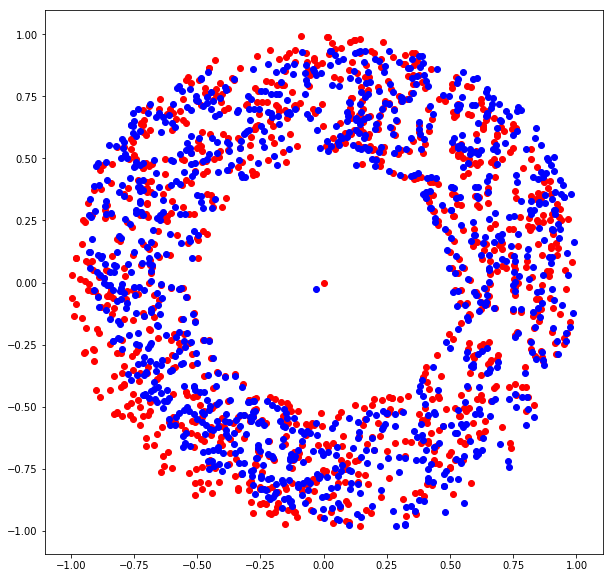

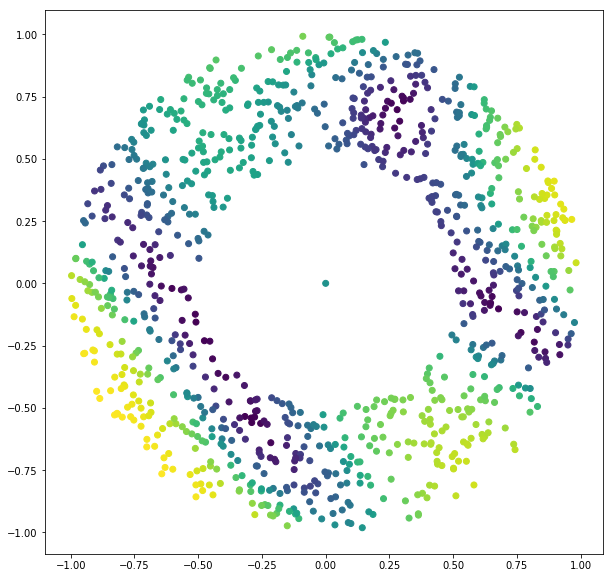

In [108]:
plt.clf()
plt.cla()
plt.close()
fig, ax = plt.subplots(figsize=(10,10))
# ax.scatter(data[:,0],data[:,1], c=X_train_costnp_rank ) # c =
ax.scatter(data[:,0],data[:,1], color='r' )
ax.scatter(X_train_reconstruct[:,0],X_train_reconstruct[:,1], color='b' ) 
fig2, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(data[:,0],data[:,1], c=X_train_costnp_rank ) 
plt.show()

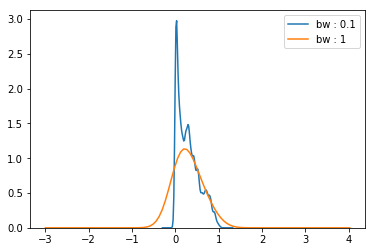

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.clf()
plt.cla()
plt.close()
sns.kdeplot(X_train_costnp,bw=0.1,label="bw : 0.1")
sns.kdeplot(X_train_costnp,bw=1,label="bw : 1")
plt.show()